## **1. Download and Extract Data to Gdrive**

In [0]:
import urllib.request
import zipfile

In [0]:
"""
Pada Project ini File tidak disimpan di temporary directory google colab
tapi data disimpan langsung kegoogle drive saya
untuk menghindari proses download berulang kali setiap menjalankan project
Klik 'Mount Drive' di sisi kiri untuk menghubungkan colab dengan drive
"""
data_url = 'https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip'
save_path = '/content/drive/My Drive/Dicoding/rockpaperscissors.zip'
unzip_path = '/content/drive/My Drive/Dicoding/'

In [0]:
#Proses Download
# remote = urllib.request.urlopen(data_url)
# data = remote.read()
# remote.close()
# local = open(save_path, 'wb')
# local.write(data)
# local.close()

In [0]:
#Proses Unzip
# with zipfile.ZipFile(save_path, 'r') as zip_ref:
#     zip_ref.extractall(unzip_path)

# **2. Data Preprocessing**

In [0]:
from keras_preprocessing.image import ImageDataGenerator

In [0]:
"""
Pada folder rockpaperscissors hasil unzip lakukan :
 - Hapus folder dan file tidak di perlukan secara manual(rps-cv-images, dan README_rpc-cv-images)
 - Buat folder dengan nama dataimages
 - Pindah kan folder image(paper, rock, scissors) ke folder dataimages
"""

base_dir = '/content/drive/My Drive/Dicoding/rockpaperscissors/dataimages'
save_dir = '/content/drive/My Drive/Dicoding/rps_datasets'

# Init paramter Data generator yang diperlukan termasuk split train dan val data
datagen = ImageDataGenerator(validation_split=0.2, #split data val sebanyak 20%
                             rescale=1./255,
                             rotation_range=20,
                             horizontal_flip=True,
                             shear_range = 0.2,
                             vertical_flip=True,
                             fill_mode = 'nearest')

In [0]:
#Proses Data generator
train_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(200, 200),
    batch_size=32,
    save_to_dir='/content/drive/My Drive/Dicoding/rps_datasets',
    class_mode='categorical', #digunakan untuk data yang lebih dari 2 class
    subset='training'
)

val_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(200, 200),
    batch_size=32,
    save_to_dir='/content/drive/My Drive/Dicoding/rps_datasets',
    class_mode='categorical',  #digunakan untuk data yang lebih dari 2 class
    subset='validation'
)

Found 1751 images belonging to 3 classes.
Found 437 images belonging to 3 classes.


# **3. Train Model**

In [0]:
import keras
from keras.models import Sequential
from keras.utils import to_categorical
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D, Dropout
import time

In [0]:
model = Sequential()

model.add(Conv2D(16, (3,3), activation='relu', input_shape=(200, 200, 3)))
model.add(MaxPooling2D(pool_size=(3,3)))

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3)))

model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(3,3)))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5)) #Dropout untuk mengurangi kemungkinan overfitting
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5)) #Dropout untuk mengurangi kemungkinan overfitting
model.add(Dense(3)) #Sejumlah class pada datasets
model.add(Activation('softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [0]:
start_time = time.time()

model.fit(
      train_generator,
      steps_per_epoch=25,
      epochs=5,
      validation_data=val_generator,
      validation_steps=5)

print("Exe Time : %s seconds" % (time.time() - start_time))

Epoch 1/5
25/25 [==============================] - 66s 3s/step - loss: 1.1006 - accuracy: 0.3565 - val_loss: 1.0800 - val_accuracy: 0.4187
Epoch 2/5
25/25 [==============================] - 60s 2s/step - loss: 0.7454 - accuracy: 0.6450 - val_loss: 0.4462 - val_accuracy: 0.8062
Epoch 3/5
25/25 [==============================] - 57s 2s/step - loss: 0.3486 - accuracy: 0.8612 - val_loss: 0.2828 - val_accuracy: 0.9060
Epoch 4/5
25/25 [==============================] - 63s 3s/step - loss: 0.3214 - accuracy: 0.8938 - val_loss: 0.1263 - val_accuracy: 0.9312
Epoch 5/5
25/25 [==============================] - 56s 2s/step - loss: 0.2174 - accuracy: 0.9305 - val_loss: 0.2462 - val_accuracy: 0.9563
Exe Time : 302.5730004310608 seconds


# **4. Predict Images**

In [0]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [0]:
def pred_image():
  uploaded = files.upload()
  
  for fn in uploaded.keys():
  
    # predicting images
    path = fn
    img = image.load_img(path, target_size=(200,200))
    imgplot = plt.imshow(img)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
  
    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)
    
    print(classes)
    if np.all(classes <= [[1, 0, 0]]):
      print('Gambar Merupaka Paper')
    elif np.all(classes <= [[0, 1, 0]]):
      print('Gambar Merupaka Rock')
    else :
      print('Gambar Merupaka Scissors')

Saving 1.jpeg to 1.jpeg
[[0. 1. 0.]]
Gambar Merupaka Rock


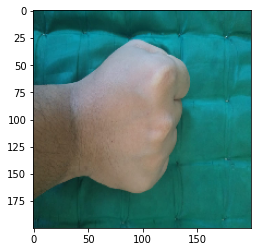

In [0]:
#Saya mengupload gambar yang saya photo sendiri
pred_image()

Saving 2.jpeg to 2.jpeg
[[1. 0. 0.]]
Gambar Merupaka Paper


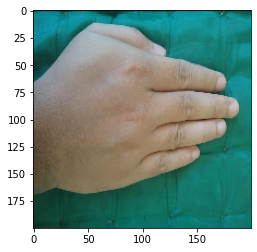

In [0]:
#Saya mengupload gambar yang saya photo sendiri
pred_image()

Saving 3.jpeg to 3.jpeg
[[0. 0. 1.]]
Gambar Merupaka Scissors


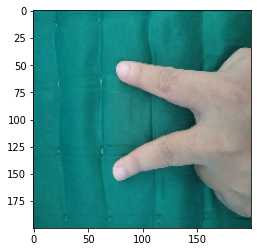

In [0]:
#Saya mengupload gambar yang saya photo sendiri
pred_image()